#Course Assignment

# Problem: Can we accurately predict the number of collisions for any given day of the week?

##Introduction

You work as a product owner for a car insurance company offering a daily insurance policy for car rentals.   

The company operates in New York and wants to price its insurance to reflect collision risk and associated costs. It wants you to explore a new feature for development that will make better predictions about this. We will use New York traffic collision data to make estimates about the number of collisions on a given day.  

For this you require weather data as there has been a link between weather and traffic collisions. The company is using data given to them by the emergency services.

The running of this scripte requires a connection to your Google Drive where you will need the following files:
- LBD_New_York_collisions_and_weather_data.csv
- LBD_testdata2019.csv

Due to Covid-19, all data since early 2020 has been fairly useless with respect to patterns. The company can see that the data has recently returned to full pre-pandemic levels. For this assignment, data from 1st of January 2013 to 31st of December 2018  will be used for training and the test data will be from 2019.

## Module 2: Get the data

This section contains boilerplate code. As long as you have uploaded your CSV files to your Google Drive, you can just run the cells as normal.

In [ ]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [ ]:
#set the size of the plots going forward, they are small be default
plt.rcParams["figure.figsize"] = (20,5)

In [ ]:
# Link with your google drive
from google.colab import drive
drive.mount('/content/gdrive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
# get our collated taxi trip and weather data from google drive
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/LBD_New_York_collisions_and_weather_data.csv')

In [ ]:
# print out abit of the data to see that its been imported and looks right
df.head()

## Module 3: Basic statistics and visualisations

In [ ]:
df = df.sort_values(["year", "mo", "da"], ascending = (True, True, True)) # order the data by year, month, day in ascending order.
df.head() # check the data again by viewing the first 5 rows

In [ ]:
df.describe()

In [ ]:
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
plt.scatter(df.day, df.NUM_COLLISIONS)
plt.show()

In [ ]:
plt.scatter(df.day, df.NUM_COLLISIONS, alpha=0.3) # the alpha adds transparency to the results, do we see more of a density plot for number of data points
plt.show()

Clean the dataset, get rid of the outliers visible in the above plot

In [ ]:
df = df[df["NUM_COLLISIONS"] > 350]
df = df[df["NUM_COLLISIONS"] < 900]

Days 6 and 7 (saturday and sunday) have far fewer collisions then any other day of the week. For the weekdays (Mon-Fri) there very similar number of collisions each day. We can check this by looking at the average number of collisions each day of the week:

In [ ]:
average_collisions = df.groupby('day')['NUM_COLLISIONS'].mean().reset_index()
average_collisions.columns = ['Day_of_the_Week', 'Average_NUM_COLLISIONS']
print(average_collisions)

Yes, so as we can see above, NUM_COLLISIONS, increases through the weekdays (apart from a slight dip with Wednesday), and then falls on Saturday and Sunday even more. To make this more of a linear relationship, we could transform Sunday to Day 1 and Saturday to Day 2 and any rename the weekdays to continue from there:

In [ ]:
df.loc[df['day'] > 0, 'day'] = df['day'] + 2 # adds two to each day, so Monday becomes 3, Sunday becomes 9
df.loc[df['day'] == 9, 'day'] = 1 # changes Day 9 (Sunday) to Day 1
df.loc[df['day'] == 8, 'day'] = 2 # changes Day 8 (Saturday) to Day 2

So now the numbers run:

1 = Saturday, 2 = Sunday, 3 = Monday, 4 = Tuesday, 5 = Wednesday, 6 = Thursday, 7 = Friday

**BE CAREFUL NOT TO RUN THIS RENUMBERING CODE MULTIPLE TIMES AS IT WILL KEEP CHANGING THE DAYS NUMBERING**

In [ ]:
plt.scatter(df.day, df.NUM_COLLISIONS, alpha=0.3) # the alpha adds transparency to the results, do we see more of a density plot for number of data points
plt.show()

Now this is much more linear and can double check with the matrix of correlation

In [ ]:
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

Gone from **-0.28** to **0.49**, a big improvement! The correlation between **day** and **NUM_COLLISIONS** has improved by **0.77** (or 77%).

  Lets look at the relationships of each of the other variables to see if anything crops up for improvement:

  Firstly, temp:

In [ ]:
plt.scatter(df.temp, df.NUM_COLLISIONS)
plt.show()

Going to group and distinguish this data by the month of the year - this will also double check the month parameter indirectly

In [ ]:
groups_months = df.groupby('mo')
for name, group in groups_months:
  plt.plot(group.temp, group.NUM_COLLISIONS, marker='o', linestyle='', markersize=2, label=name)

plt.legend()

Doesn't appear to be any issues here with the data/relationships - i.e. there isn't much of a relationship between **temp** and **NUM_COLLISIONS**

Now look at dewp:

In [ ]:
plt.scatter(df.dewp, df.NUM_COLLISIONS)
plt.show()

Now slp:

In [ ]:
plt.scatter(df.slp, df.NUM_COLLISIONS)
plt.show()

**THIS DATA NEEDS TO BE CLEANED!**

Now visib:

In [ ]:
plt.scatter(df.visib, df.NUM_COLLISIONS)
plt.show()

this again could do with being cleaned - but there are, like with slp, alot of bad data. If cleaned, this will get rid of a lot of data and reduce the quality of the final models. Keep checking other variables to see if 'better' ones to clean.

Now wdsp:

Will make an interactive scatter plot graph with plotly to go between these plots for each variable, so that we dont have to keep doing them all individually. Have had previous experience using plotly - click the variables in the legend to show/unshow different data sets.

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure
fig = go.Figure()

# Add NUM_COLLISIONS vs slp
fig.add_trace(go.Scatter(x=df['slp'], y=df['NUM_COLLISIONS'], mode='markers', name='slp'))

# Add NUM_COLLISIONS vs visib
fig.add_trace(go.Scatter(x=df['visib'], y=df['NUM_COLLISIONS'], mode='markers', name='visib'))

# Add NUM_COLLISIONS vs wdsp
fig.add_trace(go.Scatter(x=df['wdsp'], y=df['NUM_COLLISIONS'], mode='markers', name='wdsp'))

# Add NUM_COLLISIONS vs mxpsd
fig.add_trace(go.Scatter(x=df['mxpsd'], y=df['NUM_COLLISIONS'], mode='markers', name='mxpsd'))

# Add NUM_COLLISIONS vs gust
fig.add_trace(go.Scatter(x=df['gust'], y=df['NUM_COLLISIONS'], mode='markers', name='gust'))

# Add NUM_COLLISIONS vs prcp
fig.add_trace(go.Scatter(x=df['prcp'], y=df['NUM_COLLISIONS'], mode='markers', name='prcp'))

# Add NUM_COLLISIONS vs sndp
fig.add_trace(go.Scatter(x=df['sndp'], y=df['NUM_COLLISIONS'], mode='markers', name='sndp'))

# Add NUM_COLLISIONS vs fog
fig.add_trace(go.Scatter(x=df['fog'], y=df['NUM_COLLISIONS'], mode='markers', name='fog'))

# Update layout
fig.update_layout(
    title="NUM_COLLISIONS vs. Various Conditions",
    xaxis_title="Condition Value",
    yaxis_title="Number of Collisions",
    legend_title="Condition"
)

# Show plot
fig.show()

So after all that, **slp**, **visib**, **wdsp**, **mxpsd**, **gust**, **sndp** and **fog** all have outlier values.

Although fog may be a 0 or 1 value? so will leave fog out of the data cleaning process to as unsure?

First, lets see how many outliers are actually in each variable, and then we can track how their numbers change as we get rid of others.

In [ ]:
print("Total Number of rows in df:", df["day"].count())
print("Total Number of slp outliers:", (df["slp"] > 2000).sum())
print("Total Number of visib outliers:", (df["visib"] > 200).sum())
print("Total Number of wdsp outliers:", (df["wdsp"] > 200).sum())
print("Total Number of mxpsd outliers:", (df["mxpsd"] > 200).sum())
print("Total Number of gust outliers:", (df["gust"] > 200).sum())
print("Total Number of sndp outliers:", (df["sndp"] > 200).sum())

sndp is basically the whole dataset, so can't get rid of all of them. Slp and visib have a sensible number of outliers which can be removed without reducing the size of our dataset very much. They may even be overlap between the two.

Will remove visib outliers first: Thoughts about the decision to 'filter' visib - would assume if visib is bad, then more collisions and so there would be a relationship there, but also if visibility is bad, then maybe people drive slower and safer? For the purposes of this assignment will clean this one and see where we are.

In [ ]:
print("Number of rows before visib outliers removed", df["visib"].count())
df = df[df["visib"] < 200]
print("Number of rows after visib outliers removed", df["visib"].count())
print("Total Number of visib outliers:", (df["visib"] > 200).sum())

Check to see if getting rid of the visib outliers did indeed get rid of any of the slp outliers?

In [ ]:
print("Total Number of rows in df:", df["day"].count())
print("Total Number of slp outliers:", (df["slp"] > 2000).sum())
print("Total Number of visib outliers:", (df["visib"] > 200).sum())
print("Total Number of wdsp outliers:", (df["wdsp"] > 200).sum())
print("Total Number of mxpsd outliers:", (df["mxpsd"] > 200).sum())
print("Total Number of gust outliers:", (df["gust"] > 200).sum())
print("Total Number of sndp outliers:", (df["sndp"] > 200).sum())

Great, the number of slp outliers has reduced from 22 to 5. Will remove those final 5:

In [ ]:
print("Number of rows before slp outliers removed", df["slp"].count())
df = df[df["slp"] < 2000]
print("Number of rows after slp outliers removed", df["slp"].count())
print("Total Number of slp outliers:", (df["slp"] > 2000).sum())

Now lets look at the interactive plot again, see if any correlations are better:

In [ ]:
# Create figure
fig = go.Figure()

# Add NUM_COLLISIONS vs slp
fig.add_trace(go.Scatter(x=df['slp'], y=df['NUM_COLLISIONS'], mode='markers', name='slp'))

# Add NUM_COLLISIONS vs visib
fig.add_trace(go.Scatter(x=df['visib'], y=df['NUM_COLLISIONS'], mode='markers', name='visib'))

# Add NUM_COLLISIONS vs wdsp
fig.add_trace(go.Scatter(x=df['wdsp'], y=df['NUM_COLLISIONS'], mode='markers', name='wdsp'))

# Add NUM_COLLISIONS vs mxpsd
fig.add_trace(go.Scatter(x=df['mxpsd'], y=df['NUM_COLLISIONS'], mode='markers', name='mxpsd'))

# Add NUM_COLLISIONS vs gust
fig.add_trace(go.Scatter(x=df['gust'], y=df['NUM_COLLISIONS'], mode='markers', name='gust'))

# Add NUM_COLLISIONS vs prcp
fig.add_trace(go.Scatter(x=df['prcp'], y=df['NUM_COLLISIONS'], mode='markers', name='prcp'))

# Add NUM_COLLISIONS vs sndp
fig.add_trace(go.Scatter(x=df['sndp'], y=df['NUM_COLLISIONS'], mode='markers', name='sndp'))

# Add NUM_COLLISIONS vs fog
fig.add_trace(go.Scatter(x=df['fog'], y=df['NUM_COLLISIONS'], mode='markers', name='fog'))

# Update layout
fig.update_layout(
    title="NUM_COLLISIONS vs. Various Conditions",
    xaxis_title="Condition Value",
    yaxis_title="Number of Collisions",
    legend_title="Condition"
)

# Show plot
fig.show()

Also check the matrix of correlations

In [ ]:
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

Hasnt improved the slp or visib values very much, but getting rid of outliers will improve accuracy. Also to note that these exclusions have improved the correlations for day and temp.

Showing these relationships in a matrix of scatter plots:

In [ ]:
plt.rcParams["figure.figsize"] = (20,20)
pd.plotting.scatter_matrix(df)

**Now will look at the effects of seasons and annual:**

The interactive plot below shows the NUM_COLLISIONS for each year, separated by colour

In [ ]:
# Create a new column for 'dd/mm' format
df['date_dd_mm'] = pd.to_datetime(df['collision_date'], format='%d/%m/%Y').dt.strftime('%d/%m')

# Create figure
fig = go.Figure()

# Loop through each unique year and add a scatter trace for each
for year in df['year'].unique():
    df_year = df[df['year'] == year]
    fig.add_trace(
        go.Scatter(x=df_year['date_dd_mm'], y=df_year['NUM_COLLISIONS'],
                   mode='markers',
                   name=str(year)))

# Update layout
fig.update_layout(
    title="NUM_COLLISIONS over the year",
    xaxis_title="Collision Date",
    yaxis_title="Number of Collisions",
    legend_title="Year"
)

# Show plot
fig.show()

And now looking at all the years side by side:

In [ ]:

groups = df.groupby('year') # We group by year as we want to create a legend and make the visualisation clearer using colour.
plt.ylim(0, 1300)
for name, group in groups:
    plt.plot(group.collision_date, group.NUM_COLLISIONS, marker='o', linestyle='', markersize=2, label=name)

plt.legend()

There doesnt really seem to be much of a pattern over the course of each year. Apart from maybe a slight bell curve over the year with the peak of accidents occuring during the summer months. Can look at this, by plotting the against the months:

In [ ]:
# Create figure
fig = go.Figure()

# Loop through each unique year and add a scatter trace for each
for year in df['year'].unique():
    df_year = df[df['year'] == year]
    fig.add_trace(
        go.Scatter(x=df_year['mo'], y=df_year['NUM_COLLISIONS'],
                   mode='markers',
                   name=str(year)))

fig.show()

maybe ever so slightly, but most importantly, there is no increase/decrease year-on-year. This would otherwise require normalisation to account for.

Take one final look at the correlation matrix:

In [ ]:
plt.rcParams["figure.figsize"] = (20,5)
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

Its clear, **day**, **year**, **mo**, **temp** and **dewp** have correlations with **NUM_COLLISIONS** and so will be useful in determining the number of collisions on a given day.

## Module 4: Regression models

This section is all the material from Module 4

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)


First we needed to have checked if there were any nan values in the dataset. That we should have done that in the previous section but will check here:

In [ ]:
df.isna().sum()

Fortunately there aren't any! Phew.

But the below code would get rid of any of the NANs found in df.

In [ ]:
df = df.dropna()
df_final = df

The dataset has been renamed to "df_final" going forward.

## **Three predictive models will be tested:**

- Linear Regression (Single Input)
- Linear Regresion (Multiple Input)
- DNN Regression

# Linear Regression (Single Input)

The first thing is make a very simple model with just one single input and one output. For this singular output I have chosen 'day' as this had the highest correlation. The output will be 'NUM_COLLISIONS'.

Create the dataframes required:

In [ ]:
one_input_data = [df_final["day"], df_final["NUM_COLLISIONS"]]
headers = ["day", "NUM_COLLISIONS"]
df_one_input = pd.concat(one_input_data, axis=1, keys=headers)
print(df_one_input)

      day  NUM_COLLISIONS
0       4             381
1       5             480
2       6             549
3       7             505
4       2             389
...   ...             ...
2185    5             514
2186    6             582
2187    7             681
2188    2             499
2189    1             404

[2133 rows x 2 columns]


Now need to split this data into a training set and a test set. Training set will be 80% of the data, the test data will be 20%. The taining data is the data the model will train on, the test data is used for testing how well the model has preformed.

In [ ]:
train_dataset = df_one_input.sample(frac=0.8, random_state=0)
test_dataset = df_one_input.drop(train_dataset.index)

Lets take a look at this training and testing datasets:

In [ ]:
train_dataset.describe()

,day,NUM_COLLISIONS
count,1706.000000,1706.000000
mean,3.969519,601.429074
std,1.984458,95.928651
min,1.000000,355.000000
25%,2.000000,533.000000
50%,4.000000,602.500000
75%,6.000000,667.750000
max,7.000000,896.000000


In [ ]:
test_dataset.describe()

,day,NUM_COLLISIONS
count,427.000000,427.000000
mean,4.112412,607.470726
std,2.046756,97.971951
min,1.000000,388.000000
25%,2.000000,542.500000
50%,4.000000,614.000000
75%,6.000000,675.000000
max,7.000000,883.000000


Next we need to separate the target value (NUM_COLLISIONS) from the features (day).

Label is the term given to the target values, what we are trying to predict.

Again will need to do this for both the training dataset and the testing dataset.

In [ ]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('NUM_COLLISIONS') # this simultaneously gets rid of the NUM_TRIPS column from the features we just made and makes the labels datasets
test_labels = test_features.pop('NUM_COLLISIONS')

Normalisation Stage

In [ ]:
scale_factor = 1200 # 1200 chosen to be the normalisation factor

train_labels = train_labels/scale_factor
test_labels = test_labels/scale_factor

Training the Model

- tf.keras

The below code creates the normalisation layer and fits its state to the day data

In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[2]]

Normalized: [[-0.99]]


In [ ]:
day = np.array(train_features['day'])

day_normalizer = layers.Normalization(input_shape=[1,], axis=None)
day_normalizer.adapt(day)

  The below day_model will predict 'NUM_COLLISIONS' from 'day'

In [ ]:
day_model = tf.keras.Sequential([
    day_normalizer,
    layers.Dense(units=1)
])
day_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_5 (Normaliza  (None, 1)                 3         
 tion)                                                           
                                                                 
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5 (24.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 3 (16.00 Byte)
_________________________________________________________________


Now we have a model, configure the training procedure using the Keras Model.compile method.

In [ ]:
day_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

There are also other loss funtions which you could try:
- Binary cross-entropy
- Categorical cross-entropy
- Sparse categorical cross-entropy
- Mean Squared Error (MSE)
- Mean Absolute Error (MAE)


Next - use Keras model.fit to execute the training for any number of epochs (100)

In [ ]:
%%time
history = day_model.fit(
    train_features['day'],
    train_labels,
    epochs=100,
    #suppress logging
    verbose=0,
    #calculate validation results on 20% of the training data
    validation_split = 0.2)

CPU times: user 11.6 s, sys: 548 ms, total: 12.2 s
Wall time: 11.8 s


Look at the details of each epoch (loss, validation loss, and epoch number):

In [ ]:
hist=pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail() #last 5

,loss,val_loss,epoch
95,0.062390,0.056255,95
96,0.060250,0.063406,96
97,0.061123,0.055832,97
98,0.059511,0.066656,98
99,0.059294,0.057078,99


Function for plotting the loss and validation loss

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 0.2])
  plt.xlabel('Epoch')
  plt.ylabel('Error [NUM_COLLISIONS]')
  plt.legend()
  plt.grid(True)

Plotting loss and validation loss

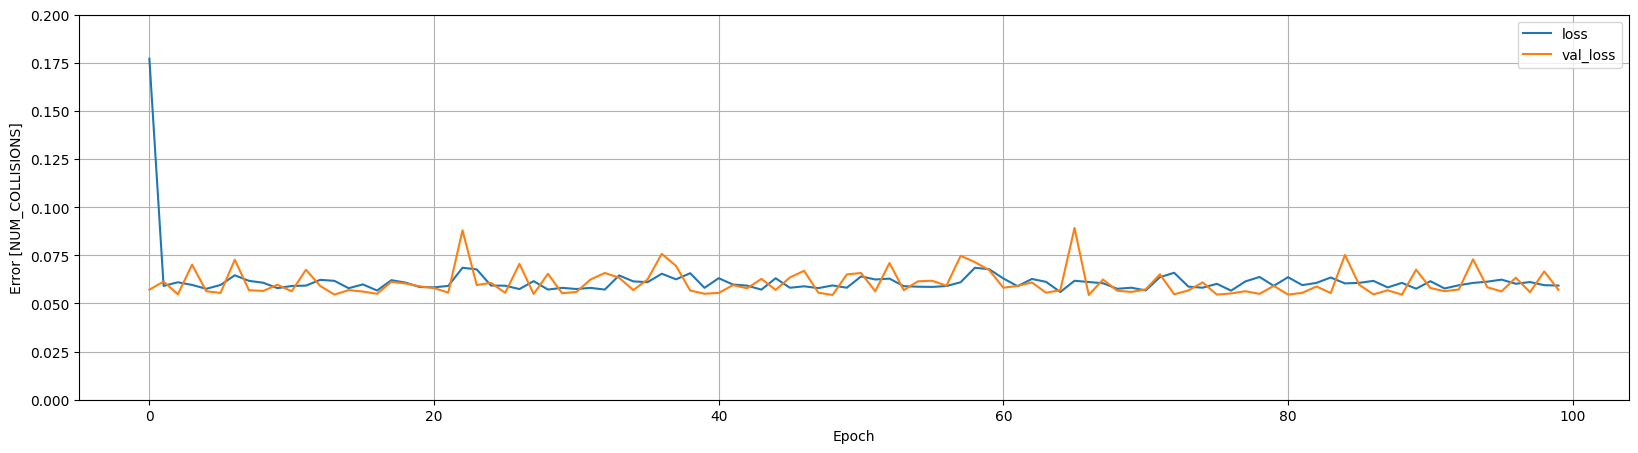

In [ ]:
plot_loss(history)

*The gap between loss and validation loss is an indication of overfitting - the larger the gap, the higher the overfitting*

This looks pretty good.

Now lets actually use the test data to get some predictions:

In [ ]:
test_results = {}

test_results['day_model'] = day_model.evaluate(
    test_features['day'],
    test_labels, verbose=0)

In [ ]:
x = tf.linspace(1,7,8)
y=day_model.predict(x)

1/1 [==============================] - 0s 63ms/step


Now plot the predictions from the test data in the same plot as the training day data

In [ ]:
def plot_day(x,y):
  plt.scatter(train_features['day'], train_labels, label='Data', alpha=0.3)
  plt.plot(x,y, color='k', label='Predictions')
  plt.xlabel('day')
  plt.ylim([0.2, 0.8])
  plt.ylabel('NUM_COLLISIONS')
  plt.legend()

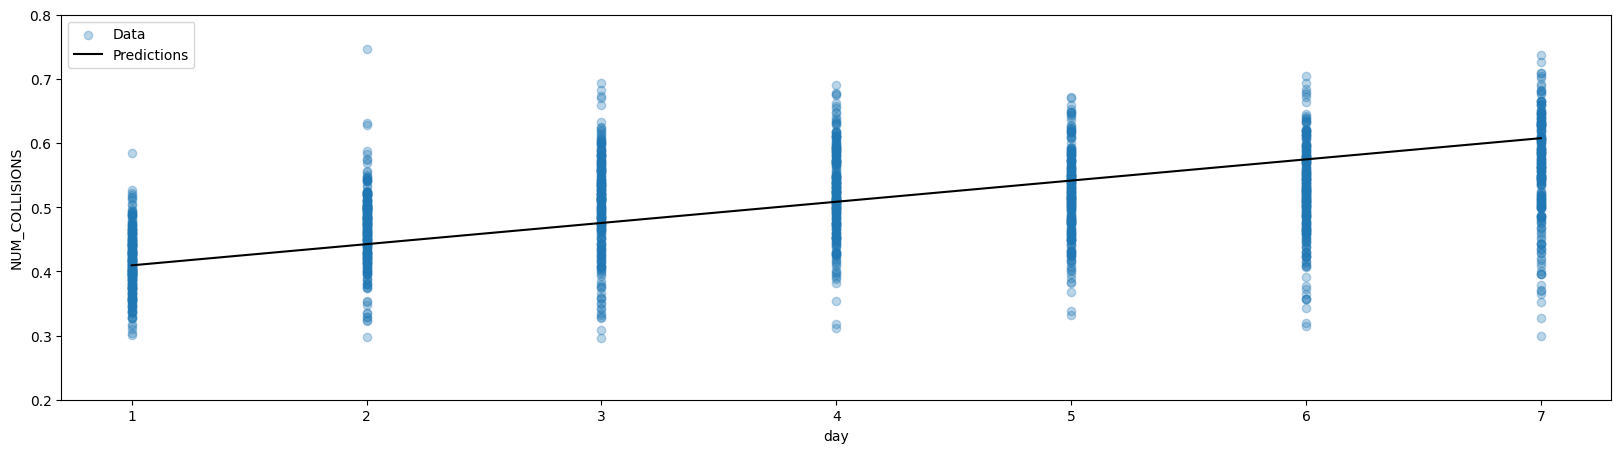

In [ ]:
plot_day(x, y)

Great - all working and looks to be doing a pretty good job!

# Linear Regression (Multiple Inputs)

NOW WE WILL TRY A LINEAR REGRESSION MODEL WITH MULTIPLE INPUTS (FIVE): **day**, **year**, **mo**, **temp** and **dewp**





In [ ]:
many_input_data = [df_final["day"], df_final["year"], df_final["mo"], df_final["temp"], df_final["dewp"], df_final["NUM_COLLISIONS"]]
headers = ["day", "year", "mo", "temp", "dewp", "NUM_COLLISIONS"]
df_many_input = pd.concat(many_input_data, axis=1, keys=headers)
df_many_input.head()

,day,year,mo,temp,dewp,NUM_COLLISIONS
0,4,2013,1,37.8,23.6,381
1,5,2013,1,27.1,10.5,480
2,6,2013,1,28.4,14.1,549
3,7,2013,1,33.4,18.6,505
4,2,2013,1,36.1,18.7,389


Same again, split into test and train datasets:

In [ ]:
train_dataset = df_many_input.sample(frac=0.8, random_state=0)
test_dataset = df_many_input.drop(train_dataset.index)

and again, split into features and labels

In [ ]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('NUM_COLLISIONS')
test_labels = test_features.pop('NUM_COLLISIONS')

have a look at the final features dataframe:

In [ ]:
train_features.head()

,day,year,mo,temp,dewp
2020,2,2018,7,78.5,59.7
391,3,2014,1,34.8,17.4
703,7,2014,12,38.4,26.0
955,7,2015,8,77.1,53.2
252,4,2013,9,74.9,63.7


scale the outputs:

In [ ]:
train_labels = train_labels/scale_factor
test_labels = test_labels/scale_factor

Have a look at the shape of these dataframes, should be 5 columns for this multi input model

In [ ]:
print(train_features.shape)

(1706, 5)


Now make a normalisation layer and test the normalisation of the first row of inputs

In [ ]:
normalizer = tf.keras.layers.Normalization(axis=1)
normalizer.adapt(np.array(train_features))
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[   2.  2018.     7.    78.5   59.7]]

Normalized: [[-0.99  1.46  0.14  1.3   0.96]]


Set up the structure of the model using the normalizer and Dense layer

In [ ]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

Check predictions of the untrained model

In [ ]:
linear_model.predict(train_features[:10])

1/1 [==============================] - 0s 58ms/step


array([[-2.2662334 ],
       [ 0.53047186],
       [ 2.438388  ],
       [ 1.5689597 ],
       [ 0.9836904 ],
       [ 1.6587517 ],
       [-0.33945906],
       [-0.22684672],
       [-2.1247497 ],
       [ 0.9319042 ]], dtype=float32)

^ its nonsense, and should be, but can see that everything is working - i.e. we have five inputs per row and one output corresponding to NUM_COLLISIONS

Can double check again with looking at the kernel weights and making sure the shape of the layers is (5,1) for this five input example:
- day
- year
- mo
- temp
- dewp


In [ ]:
linear_model.layers[1].kernel

<tf.Variable 'dense_6/kernel:0' shape=(5, 1) dtype=float32, numpy=
array([[ 0.8120909 ],
       [-0.8815961 ],
       [ 0.15864515],
       [ 0.36838412],
       [-0.7036073 ]], dtype=float32)>

same optimizer and loss as before:

In [ ]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

and again, train over 100 epochs:

In [ ]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    #suppress logging
    verbose=0,
    #calculate validation results on 20% of the training data
    validation_split = 0.2)

CPU times: user 12 s, sys: 555 ms, total: 12.6 s
Wall time: 21 s


look at the loss plots again (look for overfitting indications etc)

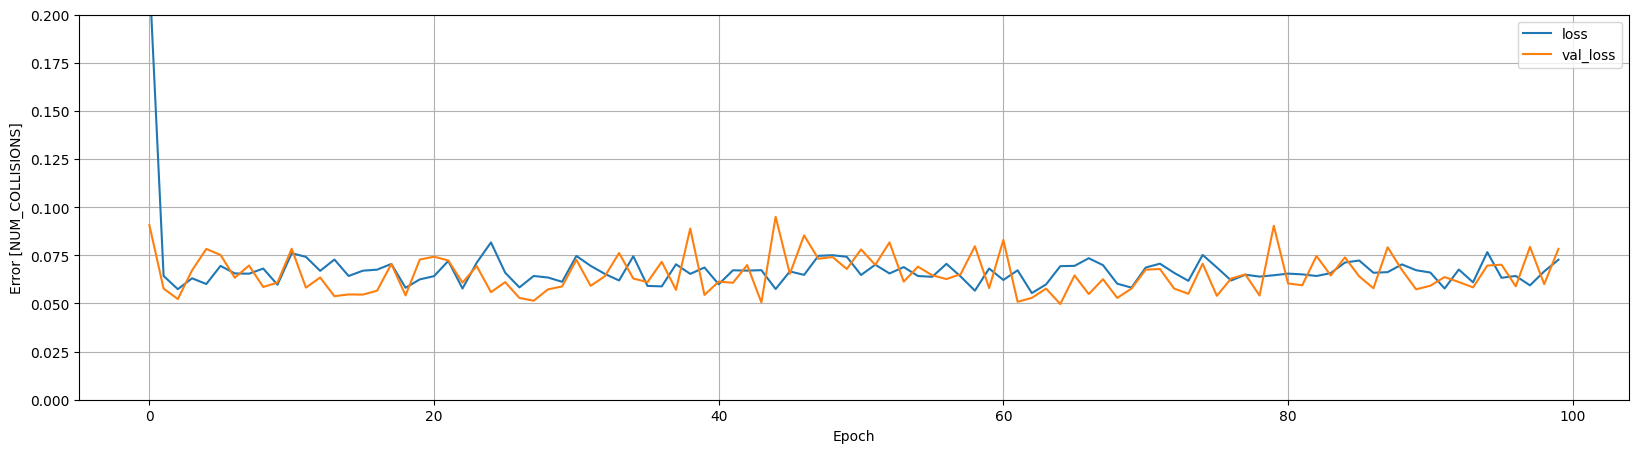

In [ ]:
plot_loss(history)

A little bit more variance than the single input linear regression model

In [ ]:
test_results['linear_model'] = linear_model.evaluate(
    test_features,
    test_labels,
    verbose=0)

Compare these two models (Day model, and linear model (temp and day))

In [ ]:
pd.DataFrame(test_results, index=['Mean absolute error [NUM_COLLISIONS]']).T

,Mean absolute error [NUM_COLLISIONS]
day_model,0.057307
linear_model,0.077616


The single input day model has outpreformed this multi-input linear model. This is to be expected as with the addition of other variables, it has essentially added noise into the model.

# DNN REGRESSION

A multiple-input DNN model

In [ ]:
df_final_dnn = df_final.copy()

One-Hot Encode day of the week

In [ ]:
# One-Hot Encoding for day
df_final_dnn['day'] = df_final_dnn['day'].map({1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday', 7: 'Saturday'})
df_final_dnn = pd.get_dummies(df_final_dnn, columns=['day'], prefix='', prefix_sep='')

Then One-Hot Encode for month

In [ ]:
df_final_dnn['mo'] = df_final_dnn['mo'].map({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})
df_final_dnn = pd.get_dummies(df_final_dnn, columns=['mo'], prefix='', prefix_sep='')

Lets see the one-hot encoding results:

In [ ]:
df_final_dnn.head()

,year,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,...,December,February,January,July,June,March,May,November,October,September
0,2013,1,01/01/2013,37.8,23.6,1011.9,10.0,6.1,8.9,19.0,...,0,0,1,0,0,0,0,0,0,0
1,2013,2,02/01/2013,27.1,10.5,1016.8,10.0,5.3,9.9,19.0,...,0,0,1,0,0,0,0,0,0,0
2,2013,3,03/01/2013,28.4,14.1,1020.6,10.0,3.7,8.0,15.0,...,0,0,1,0,0,0,0,0,0,0
3,2013,4,04/01/2013,33.4,18.6,1017.0,10.0,6.5,13.0,24.1,...,0,0,1,0,0,0,0,0,0,0
4,2013,5,05/01/2013,36.1,18.7,1020.6,10.0,6.6,12.0,21.0,...,0,0,1,0,0,0,0,0,0,0


Now make the dataframes needed for the DNN model:

In [ ]:
dnn_many_input_data = [df_final_dnn["year"], df_final_dnn["temp"], df_final_dnn["dewp"], df_final_dnn["slp"], df_final_dnn["visib"], df_final_dnn["wdsp"], df_final_dnn["gust"], df_final_dnn["prcp"], df_final_dnn["sndp"], df_final_dnn["fog"], df_final_dnn["Sunday"], df_final_dnn["Saturday"], df_final_dnn["Monday"], df_final_dnn["Tuesday"], df_final_dnn["Wednesday"], df_final_dnn["Thursday"], df_final_dnn["Friday"], df_final_dnn["January"], df_final_dnn["February"], df_final_dnn["March"], df_final_dnn["April"], df_final_dnn["May"], df_final_dnn["June"], df_final_dnn["July"], df_final_dnn["August"], df_final_dnn["September"], df_final_dnn["October"], df_final_dnn["November"], df_final_dnn["December"], df_final_dnn["NUM_COLLISIONS"]]
headers = ["year","temp","dewp","slp","visib","wdsp","gust","prcp","sndp","fog","Sunday","Saturday","Monday","Tuesday","Wednesday","Thursday","Friday","January","February","March","April","May","June","July","August","September","October","November","December","NUM_COLLISIONS"]
df_dnn_many_input = pd.concat(dnn_many_input_data, axis=1, keys=headers)
df_dnn_many_input.head()

,year,temp,dewp,slp,visib,wdsp,gust,prcp,sndp,fog,...,April,May,June,July,August,September,October,November,December,NUM_COLLISIONS
0,2013,37.8,23.6,1011.9,10.0,6.1,19.0,0.0,999.9,0,...,0,0,0,0,0,0,0,0,0,381
1,2013,27.1,10.5,1016.8,10.0,5.3,19.0,0.0,999.9,0,...,0,0,0,0,0,0,0,0,0,480
2,2013,28.4,14.1,1020.6,10.0,3.7,15.0,0.0,999.9,0,...,0,0,0,0,0,0,0,0,0,549
3,2013,33.4,18.6,1017.0,10.0,6.5,24.1,0.0,999.9,0,...,0,0,0,0,0,0,0,0,0,505
4,2013,36.1,18.7,1020.6,10.0,6.6,21.0,0.0,999.9,0,...,0,0,0,0,0,0,0,0,0,389


split this data into training and test datasets:

In [ ]:
train_dataset = df_dnn_many_input.sample(frac=0.8, random_state=0)
test_dataset = df_dnn_many_input.drop(train_dataset.index)

split features from labels:

In [ ]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('NUM_COLLISIONS')
test_labels = test_features.pop('NUM_COLLISIONS')

scale the labels:

In [ ]:
train_labels = train_labels/scale_factor
test_labels = test_labels/scale_factor

Now put the model into a function, so we can use it later:

In [ ]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

Now create a normalisation layer

In [ ]:
normalizer = tf.keras.layers.Normalization(axis=1)
normalizer.adapt(np.array(train_features))
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[2018.    78.5   59.7 1019.7   10.     3.   999.9    0.   999.9    0.
     0.     0.     1.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     1.     0.     0.     0.     0.     0. ]]

Normalized: [[ 1.46  1.3   0.96  0.34  0.66 -0.21  1.31 -0.39  0.3  -0.28 -0.41 -0.39
   2.45 -0.41 -0.42 -0.41 -0.41 -0.3  -0.29 -0.31 -0.29 -0.3  -0.29  3.22
  -0.31 -0.3  -0.3  -0.3  -0.3 ]]


Then create the DNN model by passing in our normalisation layer and have a look at the final models architecture

In [ ]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_7 (Normaliza  (None, 29)                59        
 tion)                                                           
                                                                 
 dense_7 (Dense)             (None, 64)                1920      
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 6204 (24.24 KB)
Trainable params: 6145 (24.00 KB)
Non-trainable params: 59 (240.00 Byte)
_________________________________________________________________


Now lets train the model

In [ ]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    epochs=100,
    verbose=0,
    #calculate validation results on 20% of the training data
    validation_split = 0.2)

CPU times: user 14.6 s, sys: 657 ms, total: 15.3 s
Wall time: 21.3 s


plot the loss

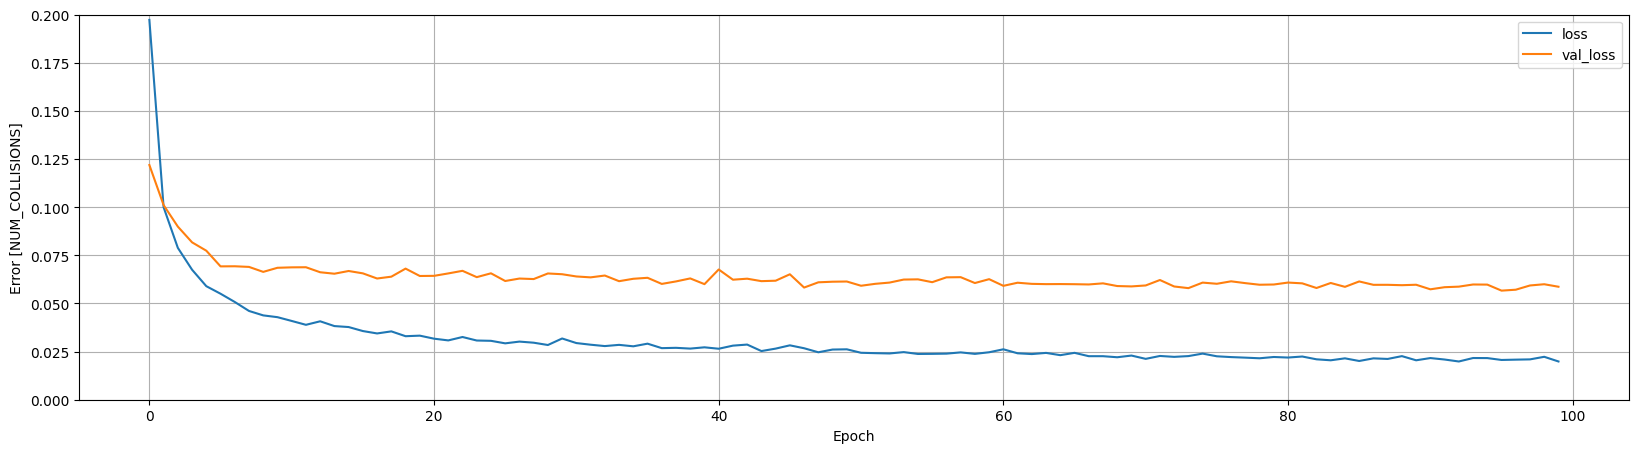

In [ ]:
plot_loss(history)

Our loss is nice and low with the val_loss a little bit higher. If this gap was to get large if could be due to overfitting.

Next store these test results:

In [ ]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

And again, compare with the other two models previous

In [ ]:
pd.DataFrame(test_results, index=['Mean absolute error [NUM_COLLISIONS]']).T

,Mean absolute error [NUM_COLLISIONS]
day_model,0.057307
linear_model,0.077616
dnn_model,0.056618


DNN is the best, but ony slightly 'beating' the one input linear regression model (day_model)

# Module 5: Using the outcomes

In this section you want to use the test data to test what kind of money you will potentially make.

Your company rents cars daily to people in New York City and is struggling in a saturated market. You have noted that you offer a flat rate damage waiver insurance package to all customers and that most customers chose not to take it. This package is something that has the potential to make the company lots of money if marketed properly.

At the moment you offer the package for a fee of 30 dollars per day, with only around 30% of all customers taking it. You rent on average 20,000 vehicles per day and therefore this package makes the company 180,000 dollars. The damage caused by collisions costs on average 500 dollars per collision with 8% of customers encountering a collision of some kind resulting in damage. The total costs from damage come to 800,000 dollars, which is covered by the customers' insurance, but around 10% of this is covered by the company due to fradulent behaviour or customers taking the waiver. This results in a profit of around 100,000 dollars per day for the sale of this package alone.

This 30 dollars is based on an expected 1,200 collisions per day (based on the maximum).

The goal of this investigation is to accurately predict the number of expected collisions on a given day in order to reduce the price of the on-demand package and therefore give value to the customer. Surveys have shown that a competitive price would result in 80% of respondents taking the damage waiver insurance option – but the price must reflect the associated costs.

------------------------------------------

In [ ]:
# only around 30% of all customers taking it
current_uptake = 0.3

# rent on average 20,000 vehicles per day
daily_rented_vehicles = 20000

# offer the package for a fee of 30 dollars per day
current_waiver_fee = 30

# package makes the company 180,000 dollars per day
income_from_package_per_day = current_uptake*daily_rented_vehicles*current_waiver_fee

# collisions costs on average 500 dollars per collision
cost_of_collision = 500

# 10% of collision cost is covered by the company
collision_ratio = 0.1

# expected 1,200 collisions per day based on maximum
max_num_collisions = 1200

In [ ]:
# assume 80% of all customers taking it
potential_uptake = 0.8
potential_min_fee = income_from_package_per_day/daily_rented_vehicles/potential_uptake
print("potential minimum fee $", potential_min_fee)

potential minimum fee $ 11.25


In [ ]:
# income over 90 days
income_90_days = income_from_package_per_day * 90
print ("income over 90 days $", income_90_days)

income over 90 days $ 16200000.0


In [ ]:
# expected costs over 90 days
expected_costs_90_days = cost_of_collision * collision_ratio * max_num_collisions * 90
print("expected costs over 90 days $", expected_costs_90_days)

expected costs over 90 days $ 5400000.0


In [ ]:
profit_90_days = income_90_days - expected_costs_90_days
print("profit over 90 days $", profit_90_days)

profit over 90 days $ 10800000.0


First, get the data and put it in my Google Drive - The below code grabs that data from the google drive and loads it into this colab notebook.

In [ ]:
df_2019_test_data = pd.read_csv('gdrive/My Drive/Colab Notebooks/LBD_testdata2019.csv')

Sort the data:

In [ ]:
df_2019_test_data = df_2019_test_data.sort_values(["year", "mo", "da"], ascending = (True, True, True))

In [ ]:
actual_costs_90_days = (df_2019_test_data["NUM_COLLISIONS"][:90] * cost_of_collision * collision_ratio).sum()
print("actual costs over 90 days $", actual_costs_90_days)

actual costs over 90 days $ 2537650.0


This is quite abit less than the expected cost already ($5.4m). Freeing up more money which could go towards further methods of attemping to reduce the price and thus further increase revenue.

In [ ]:
# REMEMBER TO CHANGE THE DAYS TO MATCH EARLIER DATA
df_2019_test_data.loc[df_2019_test_data['day'] > 0, 'day'] = df_2019_test_data['day']+2 # change all days by adding 1.
df_2019_test_data.loc[df_2019_test_data['day'] == 8, 'day'] = 2 # change days that equal 8 to day 2
df_2019_test_data.loc[df_2019_test_data['day'] == 9, 'day'] = 1 # change days that equal 9 to day 1

In [ ]:
df_2019_test_data.head()

,day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_COLLISIONS
0,4,2019,1,1,01/01/2019,50.5,43.2,1009.8,7.0,999.9,999.9,999.9,57.9,36.0,1.08,999.9,0,430
1,5,2019,1,2,02/01/2019,38.0,23.2,1024.2,10.0,999.9,999.9,999.9,57.9,35.1,0.06,999.9,0,502
2,6,2019,1,3,03/01/2019,41.1,29.4,1015.8,9.9,999.9,999.9,999.9,44.1,35.1,0.00,999.9,0,504
3,7,2019,1,4,04/01/2019,39.7,26.4,1014.8,9.9,999.9,999.9,999.9,46.0,35.1,0.00,999.9,0,598
4,2,2019,1,5,05/01/2019,44.2,41.0,1003.3,5.3,999.9,999.9,999.9,46.9,35.1,0.22,999.9,0,455


Then can run the various models using the .predict(method).

Remember to scale back up the predictions using the scale factor.

In [ ]:
linear_day_predictions = day_model.predict(df_2019_test_data["day"][:90])*scale_factor
print("linear_day_predictions", linear_day_predictions)

3/3 [==============================] - 0s 4ms/step
linear_day_predictions [[610.2156 ]
 [649.84894]
 [689.48236]
 [729.1157 ]
 [530.9487 ]
 [491.3153 ]
 [570.58215]
 [610.2156 ]
 [649.84894]
 [689.48236]
 [729.1157 ]
 [530.9487 ]
 [491.3153 ]
 [570.58215]
 [610.2156 ]
 [649.84894]
 [689.48236]
 [729.1157 ]
 [530.9487 ]
 [491.3153 ]
 [570.58215]
 [610.2156 ]
 [649.84894]
 [689.48236]
 [729.1157 ]
 [530.9487 ]
 [491.3153 ]
 [570.58215]
 [610.2156 ]
 [649.84894]
 [689.48236]
 [729.1157 ]
 [530.9487 ]
 [491.3153 ]
 [570.58215]
 [610.2156 ]
 [649.84894]
 [689.48236]
 [729.1157 ]
 [530.9487 ]
 [491.3153 ]
 [570.58215]
 [610.2156 ]
 [649.84894]
 [689.48236]
 [729.1157 ]
 [530.9487 ]
 [491.3153 ]
 [570.58215]
 [610.2156 ]
 [649.84894]
 [689.48236]
 [729.1157 ]
 [530.9487 ]
 [491.3153 ]
 [570.58215]
 [610.2156 ]
 [649.84894]
 [689.48236]
 [729.1157 ]
 [530.9487 ]
 [491.3153 ]
 [570.58215]
 [610.2156 ]
 [649.84894]
 [689.48236]
 [729.1157 ]
 [530.9487 ]
 [491.3153 ]
 [570.58215]
 [610.2156 ]
 [6

Then plot these against the actual results in a scatter plot

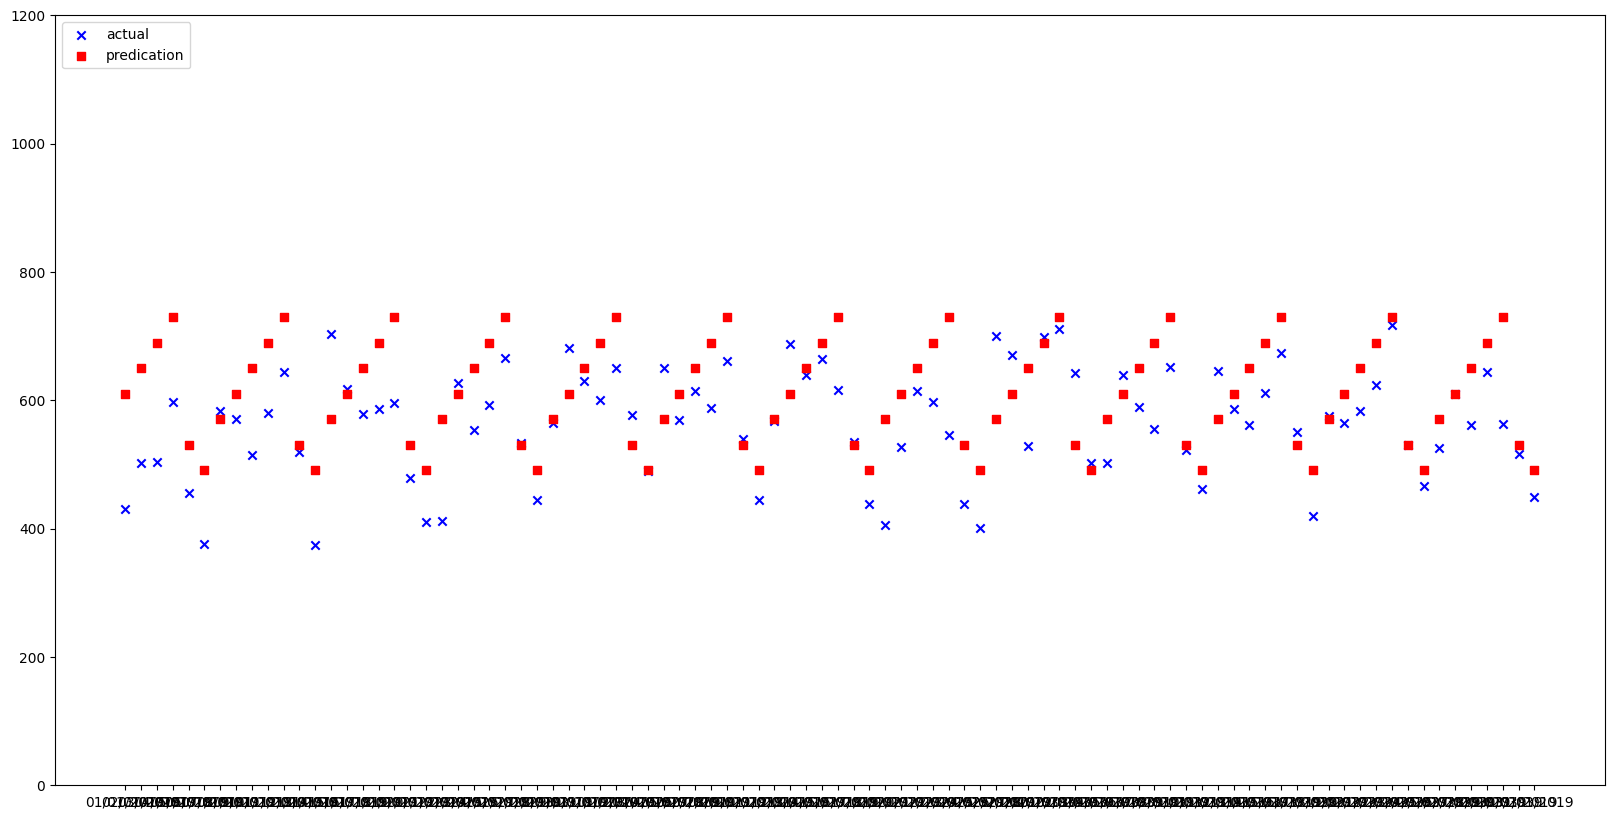

In [ ]:
plt.rcParams["figure.figsize"] = (20,10)
plt.scatter(df_2019_test_data["collision_date"][:90], df_2019_test_data["NUM_COLLISIONS"][:90], c='b', marker='x', label='actual')
plt.scatter(df_2019_test_data["collision_date"][:90], linear_day_predictions[:90], c='r', marker='s', label='predication')
plt.ylim(0, 1200)
plt.legend(loc='upper left')
plt.show()

That was the one input linear regression models results, now lets look at the multi-input linear regression model results comparison.

Variables used in this model:
- day
- year
- mo
- temp
- dewp


In [ ]:
input_data_multi_linear = [df_2019_test_data["day"][:90], df_2019_test_data["year"][:90], df_2019_test_data["mo"][:90], df_2019_test_data["temp"][:90], df_2019_test_data["dewp"][:90]]
headers = ["day", "year", "mo", "temp", "dewp"]
df_input_data_multi_linear = pd.concat(input_data_multi_linear, axis=1, keys=headers)
df_input_data_multi_linear

,day,year,mo,temp,dewp
0,4,2019,1,50.5,43.2
1,5,2019,1,38.0,23.2
2,6,2019,1,41.1,29.4
3,7,2019,1,39.7,26.4
4,2,2019,1,44.2,41.0
...,...,...,...,...,...
85,5,2019,3,39.7,9.7
86,6,2019,3,42.4,26.6
87,7,2019,3,52.8,37.8
88,2,2019,3,58.8,43.2


use this input dataframe with the model to make a prediction

In [ ]:
df_input_data_multi_linear = pd.concat(input_data_multi_linear, axis=1, keys=headers)
linear_multi_predictions = linear_model.predict(df_input_data_multi_linear)*scale_factor
print("linear_multi_predictions", linear_multi_predictions)

3/3 [==============================] - 0s 5ms/step
linear_multi_predictions [[437.32727]
 [474.2708 ]
 [478.5372 ]
 [494.10052]
 [417.1933 ]
 [417.95926]
 [469.6869 ]
 [452.98853]
 [465.55765]
 [495.15802]
 [518.78735]
 [461.69254]
 [443.41534]
 [466.20798]
 [476.71655]
 [479.09775]
 [502.63324]
 [495.35785]
 [438.894  ]
 [420.25302]
 [487.9079 ]
 [492.95743]
 [483.1543 ]
 [455.88577]
 [504.6827 ]
 [462.65216]
 [427.5525 ]
 [464.7854 ]
 [465.04968]
 [484.5205 ]
 [532.77216]
 [552.8366 ]
 [477.38593]
 [438.9503 ]
 [452.95798]
 [456.51962]
 [480.76102]
 [483.27844]
 [497.47867]
 [474.7798 ]
 [460.37186]
 [474.36752]
 [484.99924]
 [483.32584]
 [506.8057 ]
 [498.68423]
 [454.7998 ]
 [452.71518]
 [458.90823]
 [495.83746]
 [502.7401 ]
 [491.54602]
 [512.6638 ]
 [454.682  ]
 [425.27737]
 [472.20395]
 [498.45444]
 [510.12454]
 [509.08826]
 [534.3507 ]
 [463.36707]
 [453.87952]
 [477.09964]
 [512.6619 ]
 [529.8181 ]
 [539.85596]
 [543.9791 ]
 [471.85513]
 [446.3429 ]
 [470.8702 ]
 [499.6126 ]
 

plot the comparison again

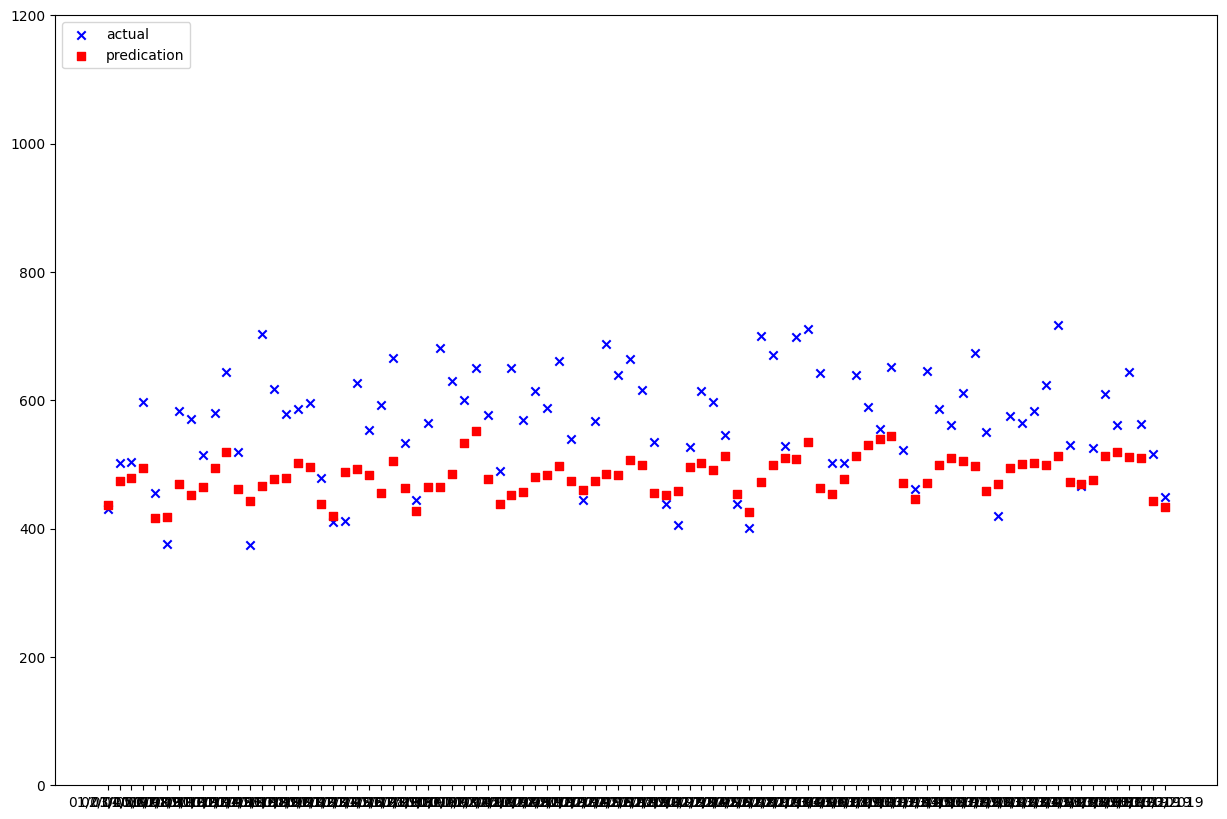

In [ ]:
plt.rcParams["figure.figsize"] = (15,10)
plt.scatter(df_2019_test_data["collision_date"][:90], df_2019_test_data["NUM_COLLISIONS"][:90], c='b', marker='x', label='actual')
plt.scatter(df_2019_test_data["collision_date"][:90], linear_multi_predictions[:90], c='r', marker='s', label='predication')
plt.ylim(0, 1200)
plt.legend(loc='upper left')
plt.show()

Interestingly, this model hasn't predicted very good range in the results, they do not deviate as much as the actual results. The predictions range from 400-600, with most towards the lower end, and the actual has a range of 350 to 700.

And lastly, the DNN model - first we need to One-Hot Encode the input data

In [ ]:
df_2019_test_data_dnn = df_2019_test_data
# One-Hot Encoding for day
df_2019_test_data_dnn['day'] = df_2019_test_data_dnn['day'].map({1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday', 7: 'Saturday'})
df_2019_test_data_dnn = pd.get_dummies(df_2019_test_data_dnn, columns = ['day'], prefix='', prefix_sep='')

#One-Hot Encoding for month
df_2019_test_data_dnn['mo'] = df_2019_test_data_dnn['mo'].map({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})
df_2019_test_data_dnn = pd.get_dummies(df_2019_test_data_dnn, columns = ['mo'], prefix='', prefix_sep='')


In [ ]:
array_2019_test_data_dnn = [df_2019_test_data_dnn["year"], df_2019_test_data_dnn["temp"], df_2019_test_data_dnn["dewp"], df_2019_test_data_dnn["slp"], df_2019_test_data_dnn["visib"], df_2019_test_data_dnn["wdsp"], df_2019_test_data_dnn["gust"], df_2019_test_data_dnn["prcp"], df_2019_test_data_dnn["sndp"], df_2019_test_data_dnn["fog"], df_2019_test_data_dnn["Sunday"], df_2019_test_data_dnn["Saturday"], df_2019_test_data_dnn["Monday"], df_2019_test_data_dnn["Tuesday"], df_2019_test_data_dnn["Wednesday"], df_2019_test_data_dnn["Thursday"], df_2019_test_data_dnn["Friday"], df_2019_test_data_dnn["January"], df_2019_test_data_dnn["February"], df_2019_test_data_dnn["March"], df_2019_test_data_dnn["April"], df_2019_test_data_dnn["May"], df_2019_test_data_dnn["June"], df_2019_test_data_dnn["July"], df_2019_test_data_dnn["August"], df_2019_test_data_dnn["September"], df_2019_test_data_dnn["October"], df_2019_test_data_dnn["November"], df_2019_test_data_dnn["December"]]
headers = ["year","temp","dewp","slp","visib","wdsp","gust","prcp","sndp","fog","Sunday","Saturday","Monday","Tuesday","Wednesday","Thursday","Friday","January","February","March","April","May","June","July","August","September","October","November","December"]
df_2019_test_data_dnn_cleaned = pd.concat(array_2019_test_data_dnn, axis=1, keys=headers)

Check the one-hot encoding

In [ ]:
df_2019_test_data_dnn_cleaned.head()

,year,temp,dewp,slp,visib,wdsp,gust,prcp,sndp,fog,...,March,April,May,June,July,August,September,October,November,December
0,2019,50.5,43.2,1009.8,7.0,999.9,999.9,1.08,999.9,0,...,0,0,0,0,0,0,0,0,0,0
1,2019,38.0,23.2,1024.2,10.0,999.9,999.9,0.06,999.9,0,...,0,0,0,0,0,0,0,0,0,0
2,2019,41.1,29.4,1015.8,9.9,999.9,999.9,0.00,999.9,0,...,0,0,0,0,0,0,0,0,0,0
3,2019,39.7,26.4,1014.8,9.9,999.9,999.9,0.00,999.9,0,...,0,0,0,0,0,0,0,0,0,0
4,2019,44.2,41.0,1003.3,5.3,999.9,999.9,0.22,999.9,0,...,0,0,0,0,0,0,0,0,0,0


Now get the predictions from the DNN model

In [ ]:
dnn_predictions_2019 = dnn_model.predict(df_2019_test_data_dnn_cleaned[:90])*scale_factor

3/3 [==============================] - 0s 5ms/step


now create the scatter comparison plot

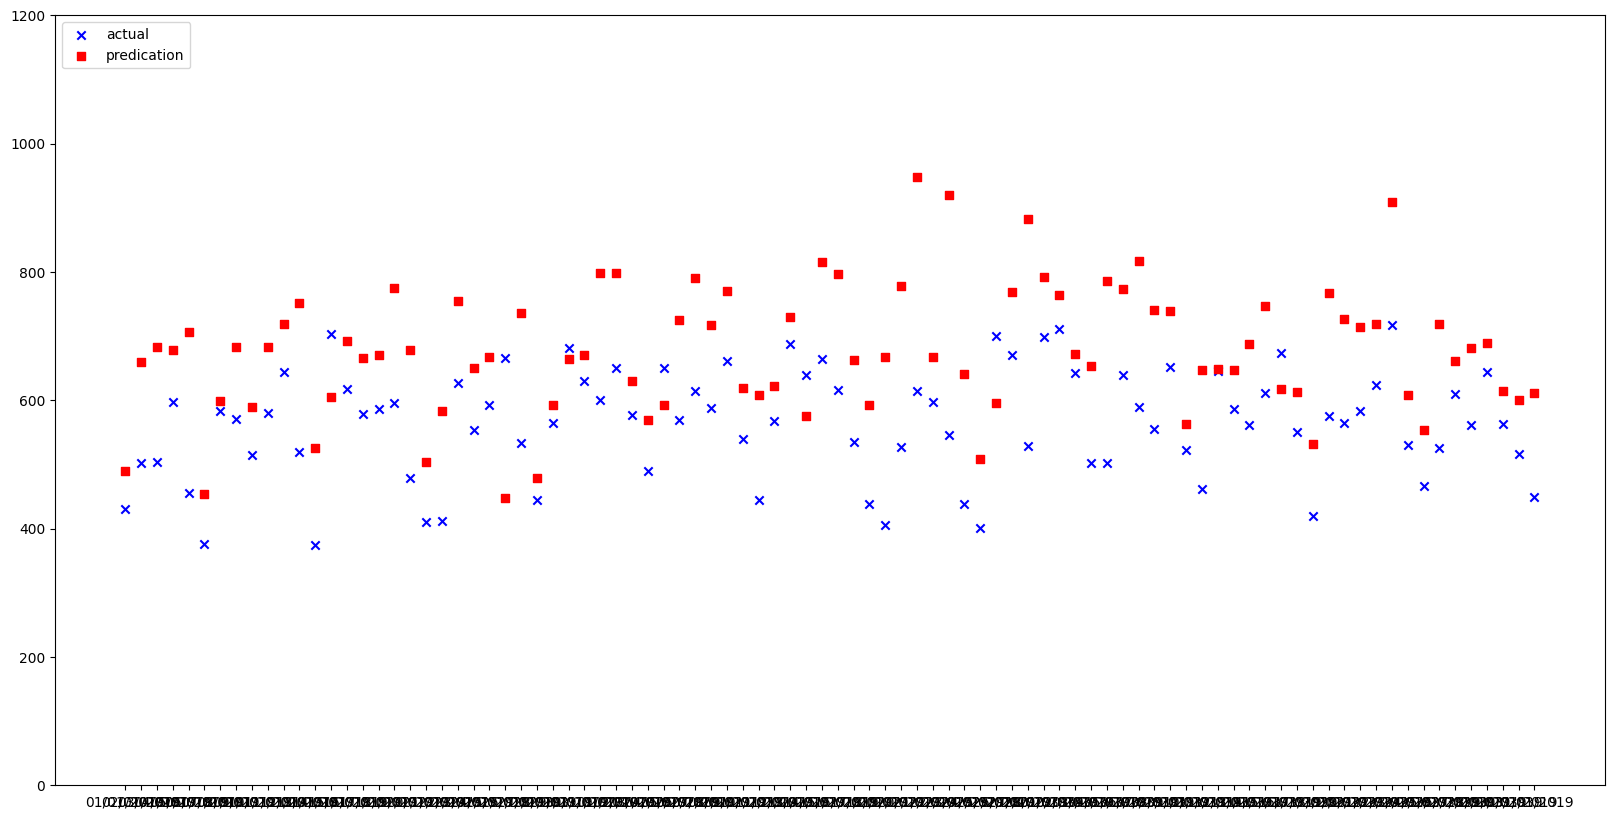

In [ ]:
plt.rcParams["figure.figsize"] = (20,10)
plt.ylim(0, 1200)
plt.scatter(df_2019_test_data["collision_date"][:90], df_2019_test_data["NUM_COLLISIONS"][:90], c='b', marker='x', label='actual')
plt.scatter(df_2019_test_data["collision_date"][:90], dnn_predictions_2019, c='r', marker='s', label='predication')
plt.legend(loc='upper left')
plt.show()

Although this is the best model, has overshot quite a few times over the 90 days. but the general behaviour is much more similar top the actual than the previous two models. Further cleaning, more epochs, varying hyperparameters may all help the accuracy. This could still be used very much as a conservative model.

In [ ]:
actual_costs_90_days = (df_2019_test_data["NUM_COLLISIONS"][:90] * cost_of_collision * collision_ratio).sum()
print("Actual cost = ${:,.0f}".format(actual_costs_90_days))
print("")
linear_day_prediction_costs_90_days = (linear_day_predictions[:90] * cost_of_collision * collision_ratio).sum()
print("Predicted cost from day input linear model = ${:,.0f}".format(linear_day_prediction_costs_90_days))
print("Cost difference from day input linear model = ${:,.0f}".format(actual_costs_90_days - linear_day_prediction_costs_90_days))
print("")
linear_multi_prediction_costs_90_days = (linear_multi_predictions[:90] * cost_of_collision * collision_ratio).sum()
print("Predicted cost from multi input linear model = ${:,.0f}".format(linear_multi_prediction_costs_90_days))
print("Cost difference from multi input linear model = ${:,.0f}".format(actual_costs_90_days - linear_multi_prediction_costs_90_days))
print("")
dnn_prediction_costs_90_days = (dnn_predictions_2019[:90] * cost_of_collision * collision_ratio).sum()
print("Predicted cost from DNN model = ${:,.0f}".format(dnn_prediction_costs_90_days))
print("Cost difference from DNN model = ${:,.0f}".format(actual_costs_90_days - dnn_prediction_costs_90_days))
print("")

Actual cost = $2,537,650

Predicted cost from day input linear model = $2,747,952
Cost difference from day input linear model = $-210,302

Predicted cost from multi input linear model = $2,163,734
Cost difference from multi input linear model = $373,916

Predicted cost from DNN model = $3,043,430
Cost difference from DNN model = $-505,780

